CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

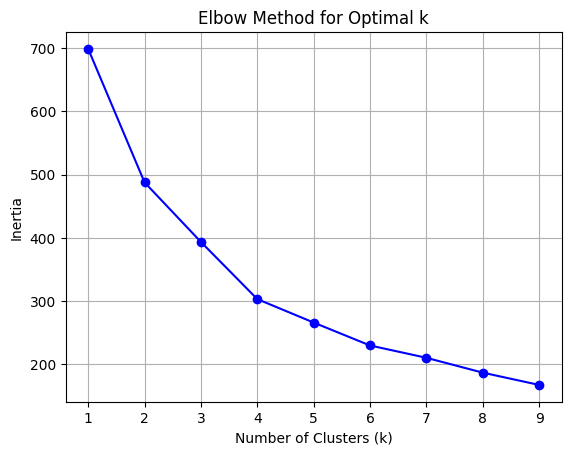

The optimal number of clusters (k) is 2


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample data with mixed categorical and numerical features
data = pd.read_csv('Mall_Customers.csv')

print(data.isnull().sum())
data.info()

# data['Defaulted'].fillna(1, inplace=True)  # Fill missing values with 0


# data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0
data = data.drop('CustomerID', axis='columns')

# data = pd.DataFrame({
#     'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Blue'],
#     'Size': ['Small', 'Large', 'Medium', 'Small', 'Large', 'Large'],
#     'Weight': [10, 20, 15, 12, 25, 23]
# })

# Define which columns are categorical and numerical
categorical_cols = ['Genre']
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize a list to store inertia values for different k
inertia = []

# Determine the optimal number of clusters (k) using the elbow method
for k in range(1, 10):  # Set k to a maximum of 5
    kmeans = KMeans(n_clusters=k, random_state=0)
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', kmeans)
    ])
    model.fit(data)
    inertia.append(kmeans.inertia_)

# Calculate the differences between consecutive inertia values
diffs = np.diff(inertia)

# Find the "elbow" point based on a threshold (e.g., 10% change)
threshold = 0.50  # You can adjust this threshold as needed
elbow_index = np.where(diffs < threshold * np.max(diffs))[0][0] + 1
optimal_k = elbow_index + 1

# Plot the elbow curve
# plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

print(f'The optimal number of clusters (k) is {optimal_k}')

In [94]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000
